In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [107]:
file_path = '../data/raw/smoking_driking_dataset_Ver01.csv'
df = pd.read_csv(file_path)

print("Original Dataset Preview:")
print(df.head())
orig_rows, orig_cols = df.shape

Original Dataset Preview:
    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_cre

In [108]:
categorical_cols = ['sex', 'SMK_stat_type_cd', 'DRK_YN']
numeric_cols = [col for col in df.columns if col not in categorical_cols]

In [109]:
df_capped_iqr = df.copy()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_capped_iqr[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [110]:
df_iqr_removed = df.copy()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.9)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_iqr_removed = df_iqr_removed[(df_iqr_removed[col] >= lower_bound) & (df_iqr_removed[col] <= upper_bound)]

In [111]:
df_z_removed = df.copy()
for col in numeric_cols:
    mean = df_z_removed[col].mean()
    std = df_z_removed[col].std()
    z_scores = (df_z_removed[col] - mean) / std
    df_z_removed = df_z_removed[np.abs(z_scores) <= 3]

In [112]:
df_capped_z = df.copy()
for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    df_capped_z[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

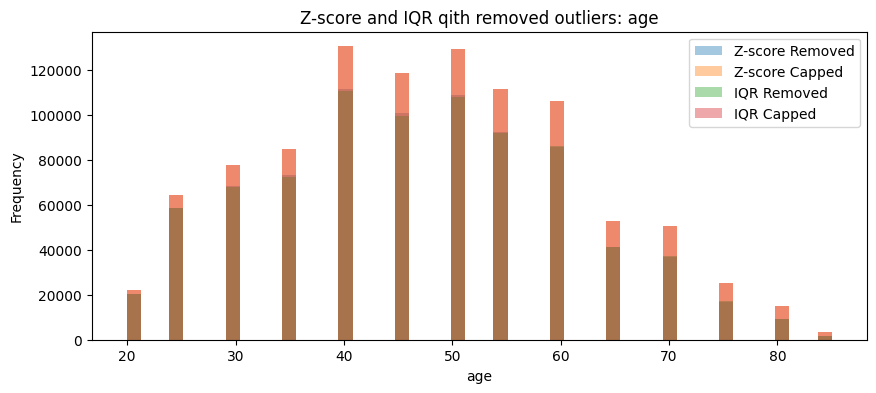

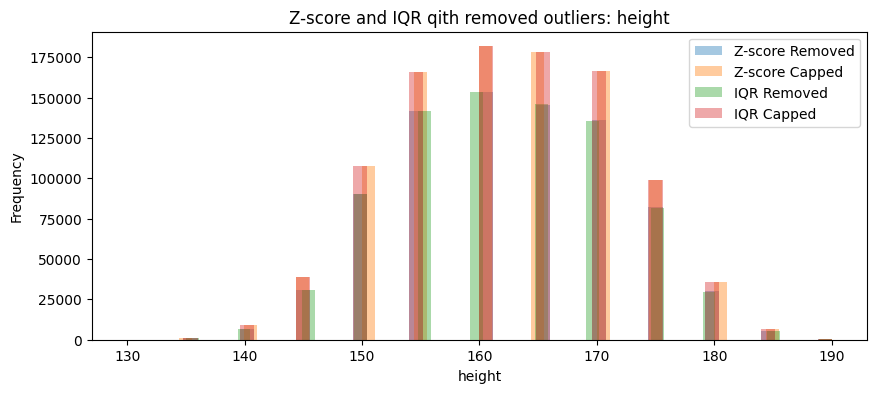

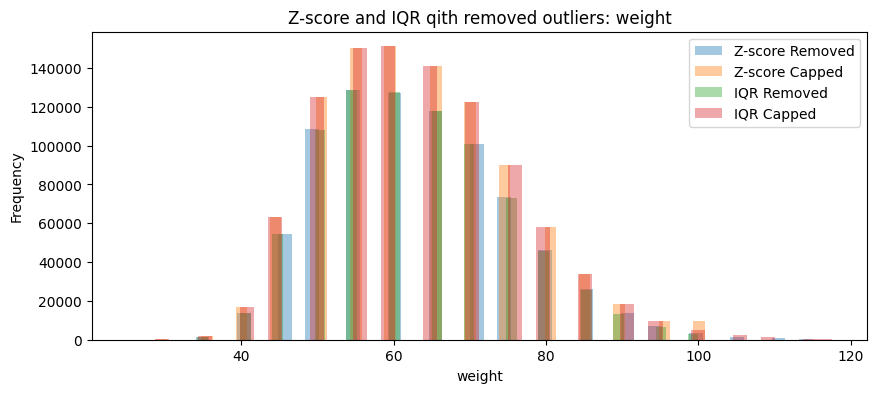

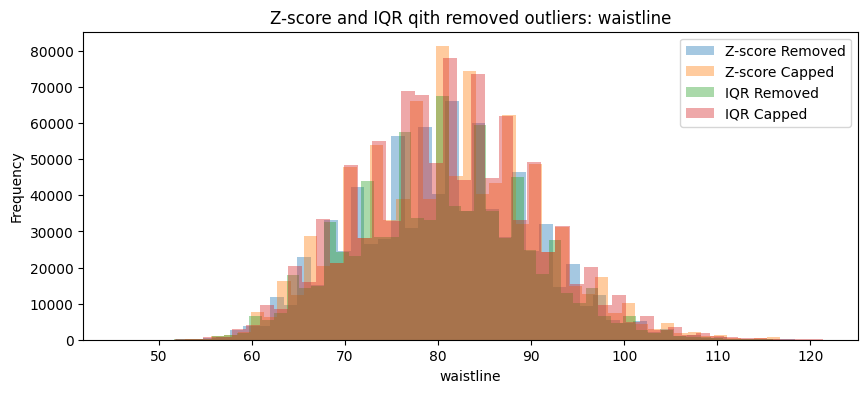

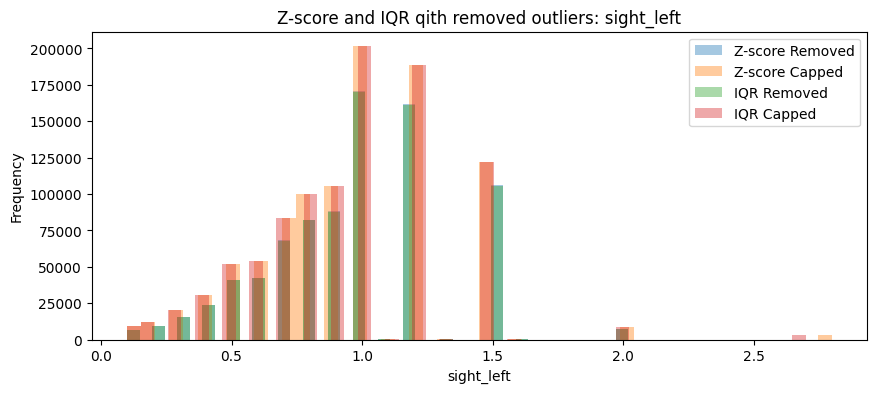

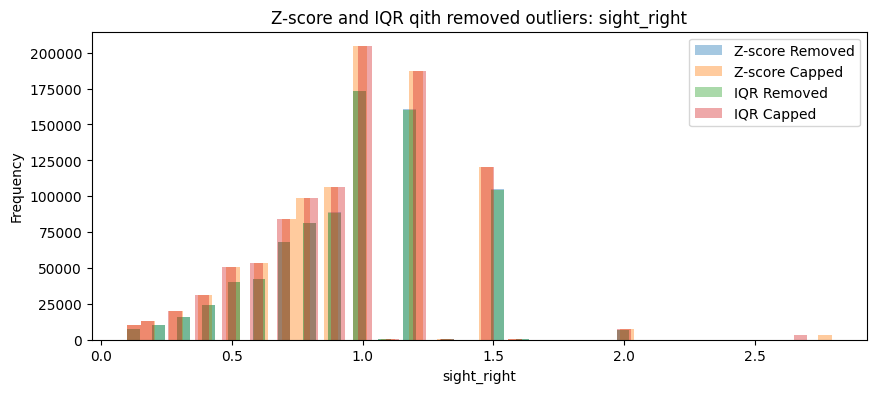

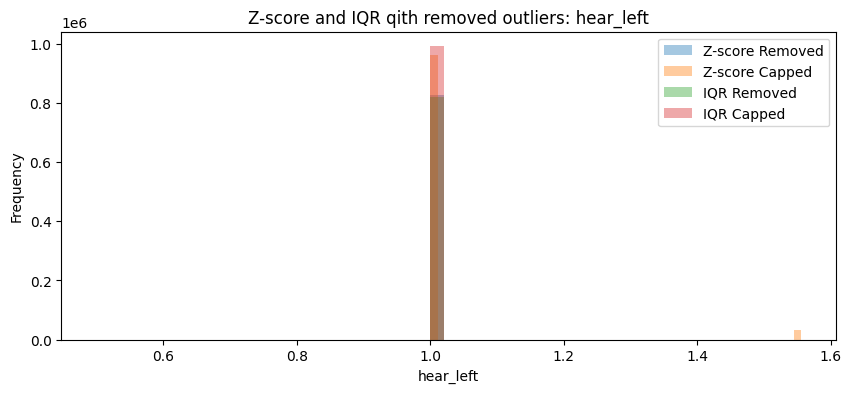

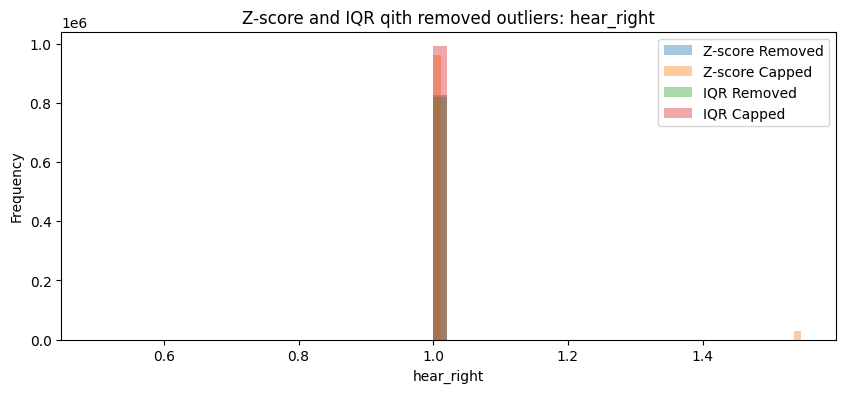

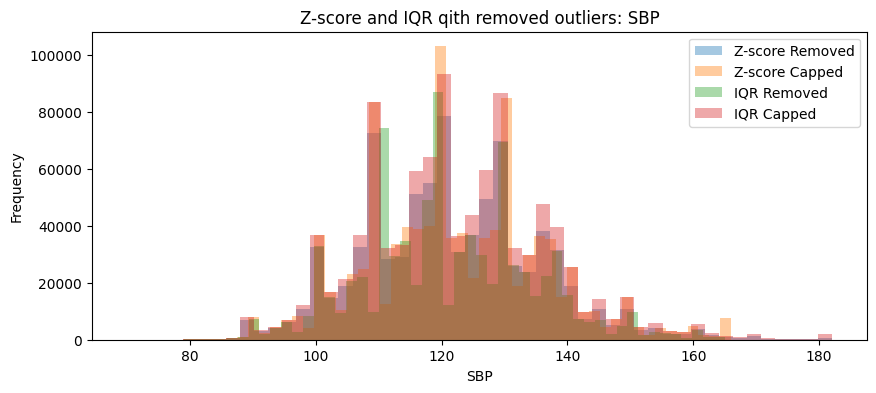

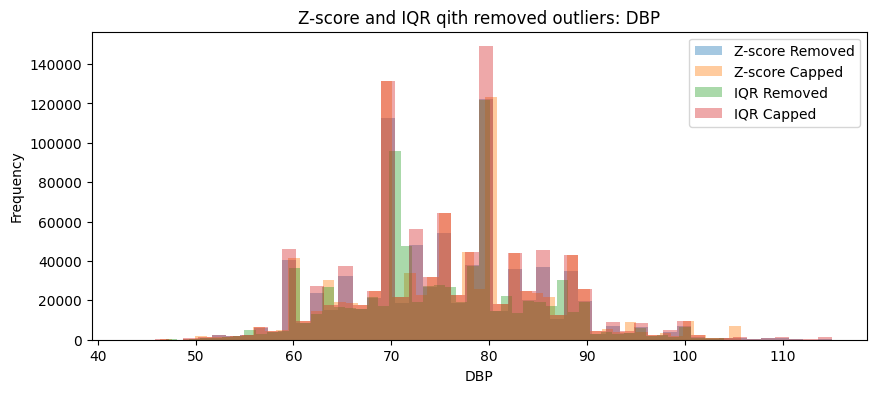

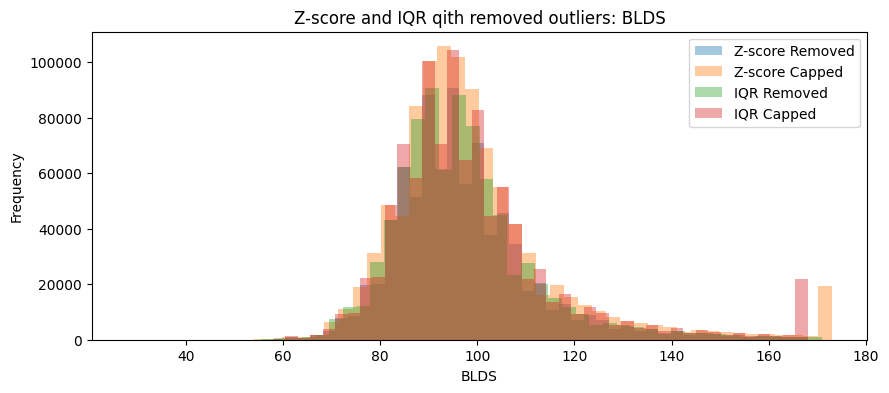

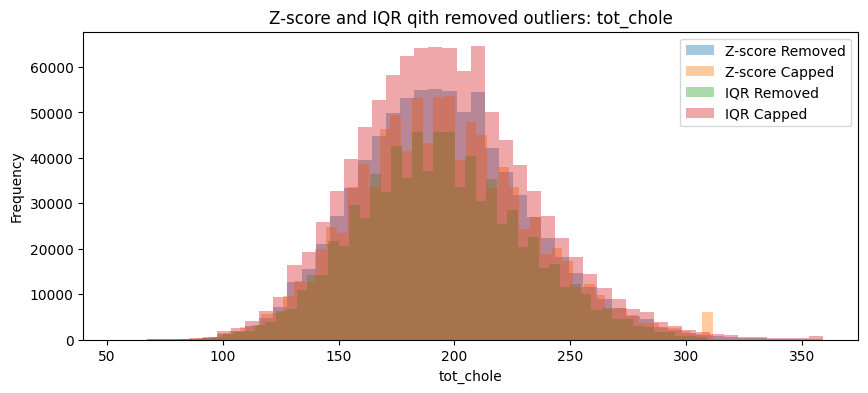

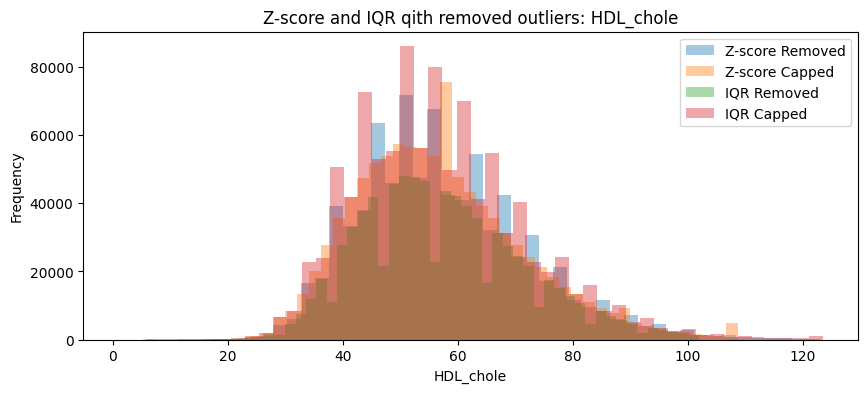

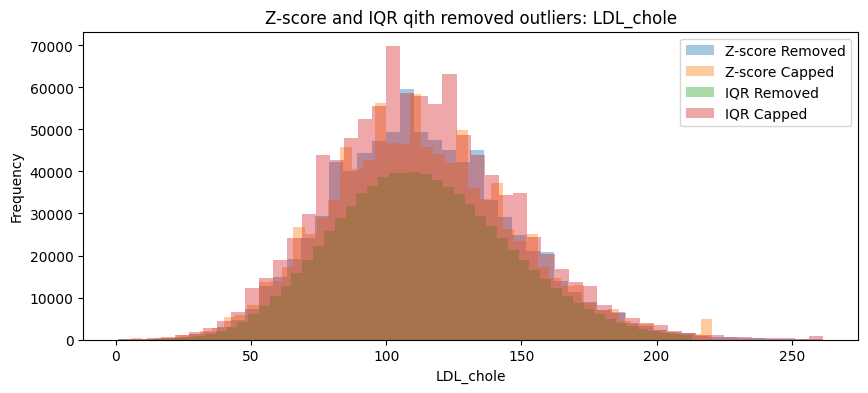

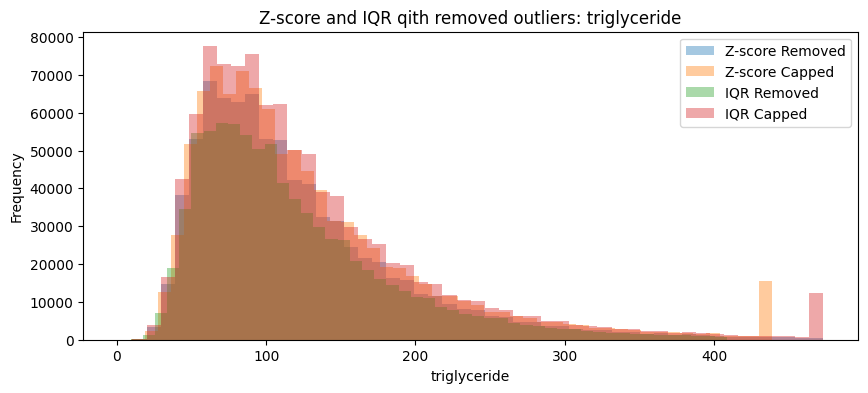

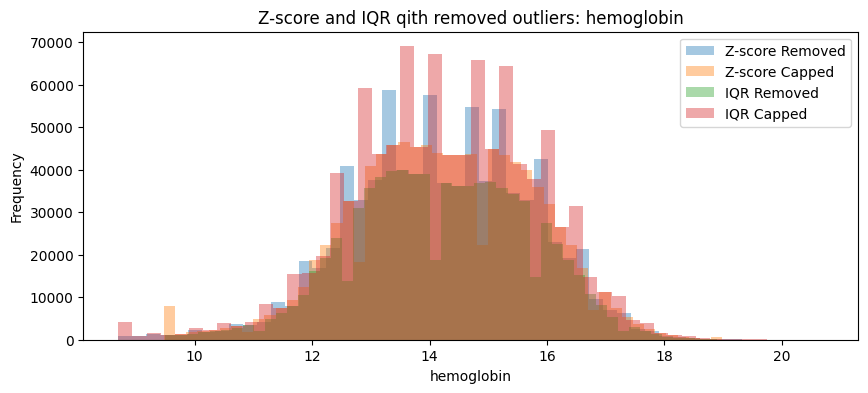

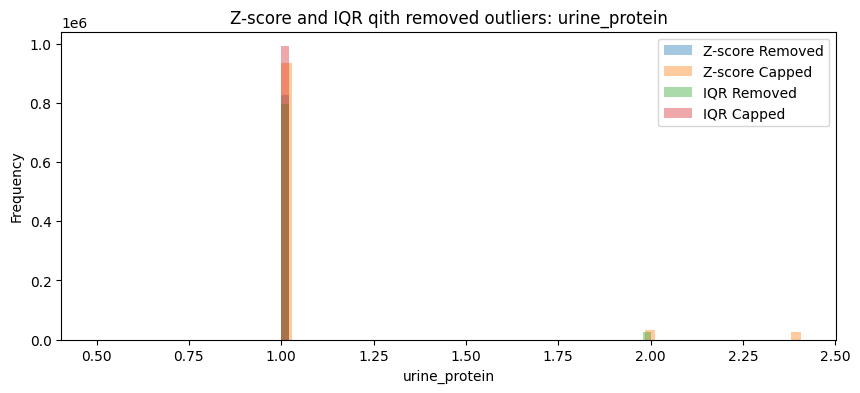

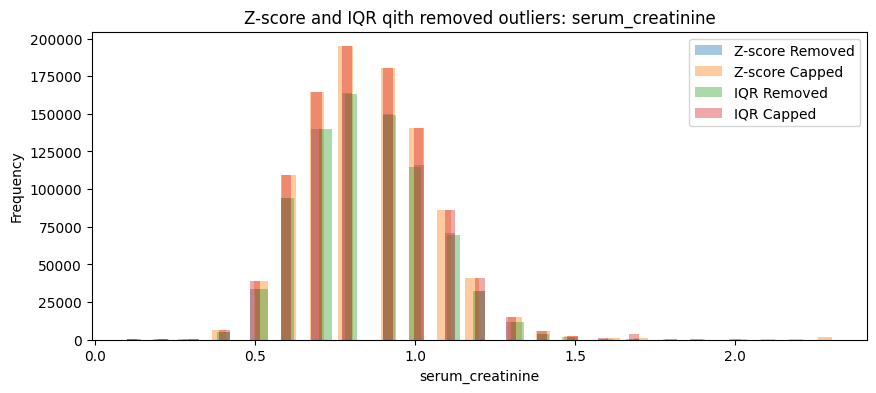

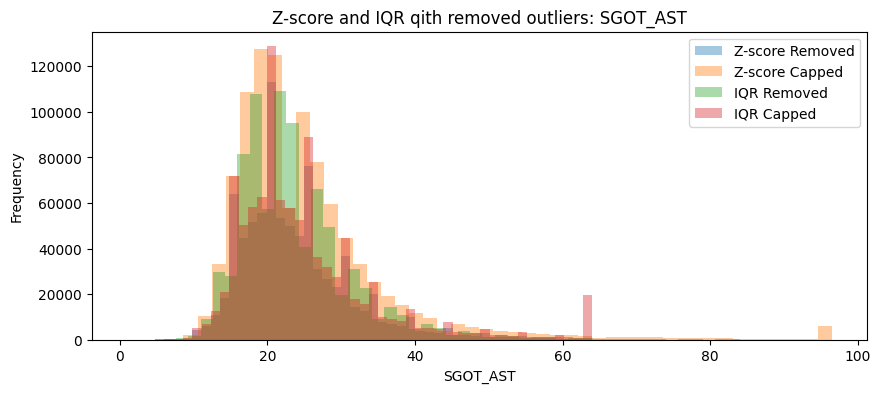

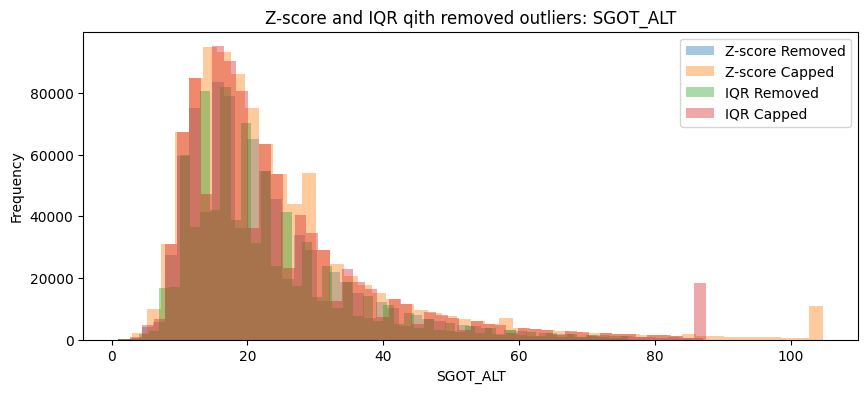

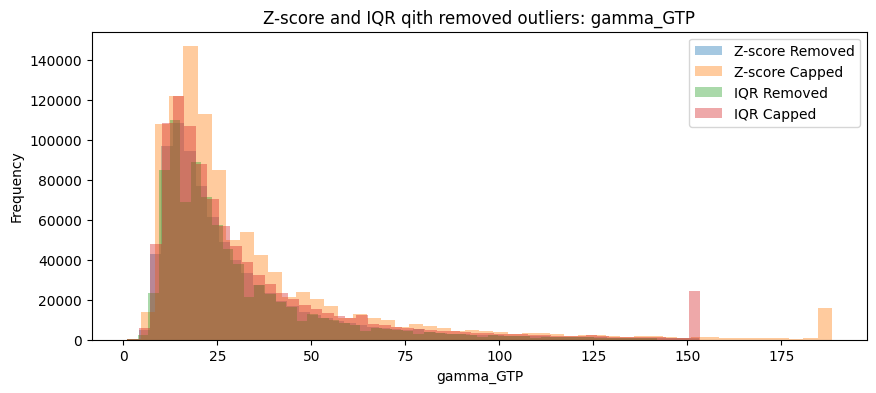

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.hist(df_z_removed[col], bins=50, alpha=0.4, label='Z-score Removed')
    plt.hist(df_capped_z[col], bins=50, alpha=0.4, label='Z-score Capped')
    plt.hist(df_iqr_removed[col], bins=50, alpha=0.4, label='IQR Removed')
    plt.hist(df_capped_iqr[col], bins=50, alpha=0.4, label='IQR Capped')
    plt.title(f"Z-score and IQR qith removed outliers: {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()